In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

#!ls "/content/drive/My Drive/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Get a list of devices like GPUs and CPUs available to TF

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6863512510580937044
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11113376137190403985
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 16083211834806566548
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11151058535
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18193181709941405922
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


<h3>MNIST DATASET</h3>

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning.It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8%. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.

In [4]:
#If keras is not using tensorflow as backend, set "KERAS_BACKEND=tensorflow"
from keras.utils import np_utils 
from keras.datasets import mnist
from keras import datasets
import seaborn as sns
from keras.initializers import RandomNormal
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [0]:
#This function is used to plot/update the train and test loss after each epoch.
#Reference: https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
#Reference: https://stackoverflow.com/a/14434334

import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
#Load the MNIST dataset, shuffle and split the data into train and test set.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
#Print the dimensions of the train and test data.
print("Number of training samples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training samples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training samples : 60000 and each image is of shape (28, 28)
Number of training samples : 10000 and each image is of shape (28, 28)


In [0]:
#The input shape is a 3 dimensional vector. For each image we have a (28*28) vector. We will convert the (28*28) vector into single dimensional vector of 1 * 784 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [9]:
#Dimensions of the train and test data after flattening each row.
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


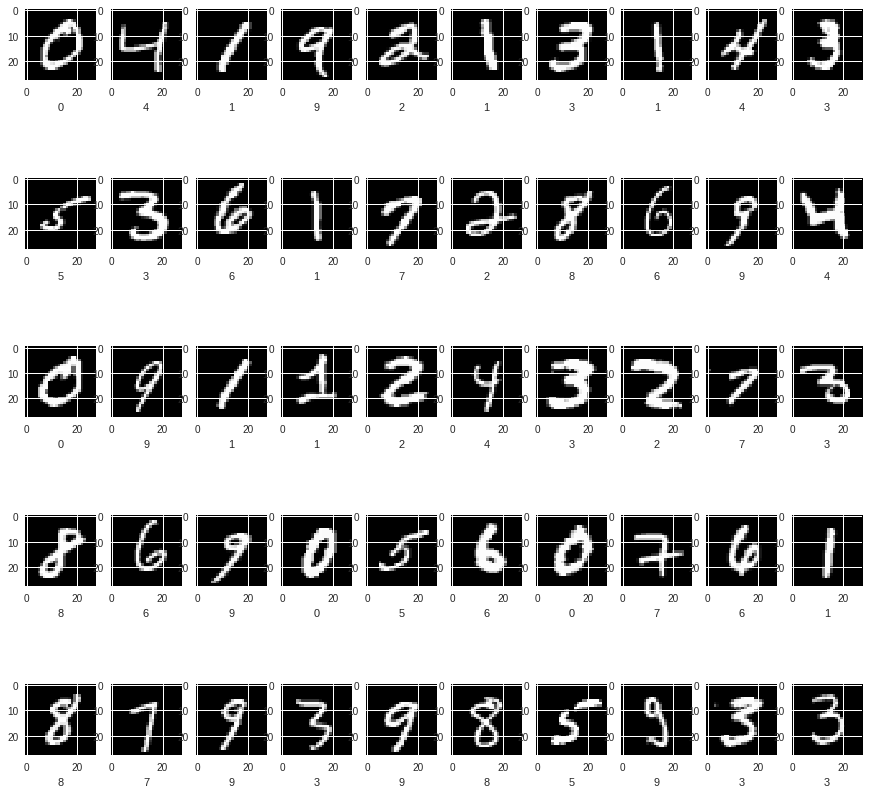

In [10]:
#Display or plot a number from the MNIST train dataset. Find the corresponding labels below the images.
plt.figure(figsize=(15,15))
for i in range(1,51):
    row = i
    grid_data = X_train[row].reshape(28,28) #Reshape from 1d to 2d pixel array
    plt.subplot(5,10,row)
    plt.imshow(grid_data, interpolation = "none", cmap = "gray")
    plt.xlabel(y_train[row],labelpad=5)
plt.show()

In [11]:
#A sample data point before data Normalization.
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [12]:
#If we observe the above matrix each cell is having a value between 0-255. Let's normalize the data before we apply Deep Learning Algorithms on it.
# X = (X - Xmin)/(Xmax-Xmin) = X/255 (Xmin = 0, Xmax = 255)

X_train = X_train/255
X_test = X_test/255

#A sample data point after Normalization.
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

<h3>2D Visualization of the MNIST train dataset using PCA.</h3>

Shape of the Data Matrix before reducing dimension:  (60000, 784)
Shape of the Data Matrix after reducing dimension:  (60000, 2)


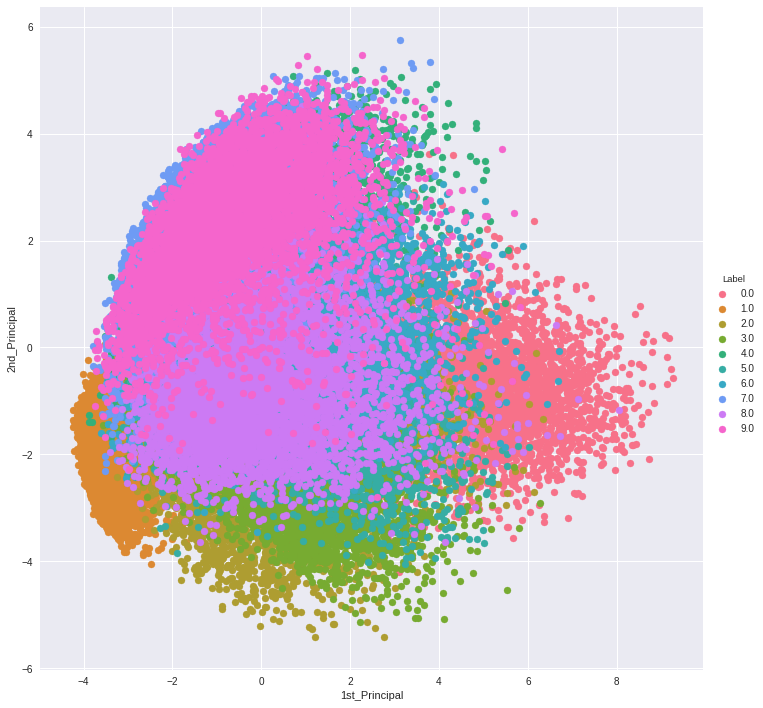

In [0]:
#Visualize the MNIST train dataset in 2D using PCA.
import pandas as pd
import seaborn as sn

#Initialize the PCA
from sklearn import decomposition
pca = decomposition.PCA()

#Configure the parameteres: Number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(X_train)

#pca_data will contain the 2-D projections of X_train
print("Shape of the Data Matrix before reducing dimension: ",X_train.shape)
print("Shape of the Data Matrix after reducing dimension: ",pca_data.shape)

#Attaching the label for each 2D data point. 
pca_data = np.vstack((pca_data.T, y_train)).T

#Creating a new dataframe which help us in ploting the result data. The new dataframe contains the reduced dimension of X_train along with the class label.
pca_df = pd.DataFrame(data=pca_data, columns=("1st_Principal", "2nd_Principal", "Label"))
sn.FacetGrid(pca_df, hue="Label", size=10).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
plt.show()

<h3>2D Visualization of the MNIST train dataset using t-SNE.</h3>

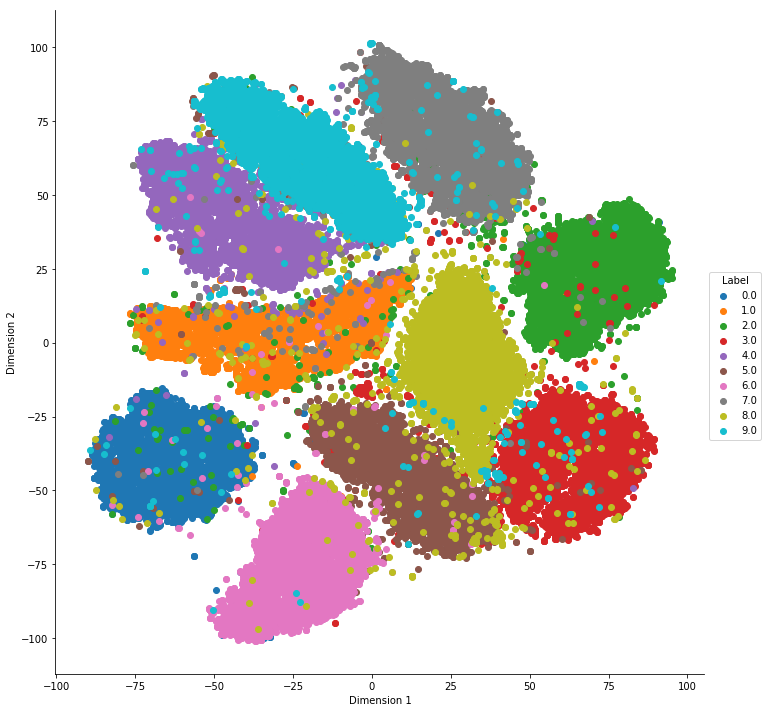

In [0]:
#Visualize the MNIST train dataset in 2D using t-SNE.
import seaborn as sn

#Initialize the t-SNE. Configure the parameteres: Number of components = 2
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=2000, metric='euclidean', random_state=0)
tsne_data = tsne.fit_transform(X_train)

#Creating a new dataframe which help us in ploting the result data. The new dataframe contains the reduced dimension of X_train along with the class label.
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension 1", "Dimension 2", "Label"))

#Ploting the result of tsne reduction
sn.FacetGrid(tsne_df, hue="Label", size=10).map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
plt.show()

#Ploting the result of tsne reduction
sn.FacetGrid(tsne_df, hue="Label", size=10).map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
plt.show()

<h3>Encoding the class variables.</h3>

In [13]:
#Here we are having a class number for each image.

print("Before converting the class labels into binary vectors..")
print("Class label of first image :", y_train[0])
print("Class label of second image :", y_train[1])
print("Class label of third image :", y_train[2])

#Let's convert class numbers into a 10 dimensional vector. Example: Consider an image is 5. We will convert 5 into => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]. Similarly 3 into => [0, 0, 0, 3, 0, 0, 0, 0, 0, 0]
#This process can also be done using the OneHotEncoding tool in scikit learn.

y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

print("\nAfter converting the class labels into binary vectors..")
print("Class label of first image :", y_train[0])
print("Class label of second image :", y_train[1])
print("Class label of third image :", y_train[2])

Before converting the class labels into binary vectors..
Class label of first image : 5
Class label of second image : 0
Class label of third image : 4

After converting the class labels into binary vectors..
Class label of first image : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Class label of second image : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Class label of third image : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


<h3>A simple Softmax Classifier on the MNIST dataset + SGD Optimizer</h3>

In [14]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

#Initialize model parameters

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 50

#Start building a model
model = Sequential()

#The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference)
#needs to receive information about its input shape. 
#We can use input_shape and input_dim to pass the shape of input

#output_dim represent the number of nodes we need in that layer. Here we have 10 nodes => 10 class labels
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

#Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments: An optimizer, a loss function, a list of metrics.
#Optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
#Loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
#List of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/

#Note: when using the categorical_crossentropy loss, your targets should be in categorical format  (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
#This is why we converted out labels into cetegorical vectors.

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 37us/step - loss: 1.2809 - acc: 0.7018 - val_loss: 0.8150 - val_acc: 0.8343
Epoch 2/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.7178 - acc: 0.8403 - val_loss: 0.6097 - val_acc: 0.8626
Epoch 3/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.5886 - acc: 0.8591 - val_loss: 0.5273 - val_acc: 0.8728
Epoch 4/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.5267 - acc: 0.8689 - val_loss: 0.4813 - val_acc: 0.8817
Epoch 5/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.4889 - acc: 0.8758 - val_loss: 0.4515 - val_acc: 0.8855
Epoch 6/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.4629 - acc: 0.8797 - val_loss: 0.4299 - val_acc: 0.8902
Epoch 7/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.4436 - acc: 0.8834 - val_loss: 0.4138 - val_acc

Test score (Validation Loss): 0.2992920946538448
Test accuracy (Accuracy on Unseen Data): 0.9172


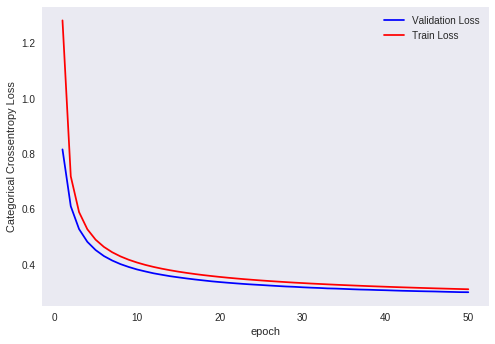

In [15]:
#Plot the train and test loss vs number of epochs
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score (Validation Loss):', score[0]) 
print('Test accuracy (Accuracy on Unseen Data):', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,nb_epoch+1))

#print(history.history.keys())
#dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
#history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

#We will get val_loss and val_acc only when we pass the paramter validation_data, val_loss : validation loss, val_acc : validation accuracy

#loss : training loss
#acc : train accuracy
#for each key in histrory.histrory we will have a list of length equal to number of epochs

val_loss = history.history['val_loss'] #Validation Loss
loss = history.history['loss'] #Training Loss
plt_dynamic(x, val_loss, loss, ax)

#Save the model.
from keras.models import load_model
model.save('/content/drive/My Drive/MNIST_simple_softmax.h5') #Load using: model = load_model('MNIST_simple_softmax.h5')

#Save model information in a list for later use
model_data=[]
model_arch='784-10 (Simple Softmax)'
nb_hdn_layers=0

scores_history=[np.round(history.history['loss'][-1],4), np.round(history.history['acc'][-1],4), np.round(history.history['val_loss'][-1],4), np.round(history.history['val_acc'][-1],4)]
model_data.append([model_arch,nb_hdn_layers]+scores_history)

Text(0.5,0,'Output Layer')

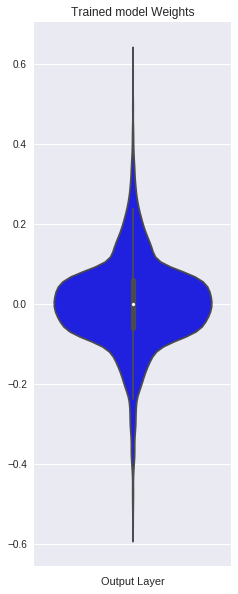

In [16]:
#Violin Plots for all the weights matrices.
w_after = model.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,10))
plt.title("Weight matrices after model is trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Output Layer')

<h3> MNIST + ReLU Activation + ADAM optimzer + He initialization. Model Architecture: 784-512-128-10</h3>

In [17]:
output_dim = 10
input_dim = X_train.shape[1] #784 
batch_size = 128 
nb_epoch = 50

#For relu layers
#If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
#h1 =>  σ=√(2/(fan_in) = 0.050  => N(0,σ) = N(0,0.050)
#h2 =>  σ=√(2/(fan_in) = 0.0625  => N(0,σ) = N(0,0.0625)
#out =>  σ=√(2/(fan_in+1) = 0.125  => N(0,σ) = N(0,0.125)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0505, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model_relu.add(Dense(output_dim, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

#Get a summary of the model.
print(model_relu.summary())

#Compile the model
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Run the model.
history = model_relu.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.2422 - acc: 0.9289 - val_loss: 0.1233 - val_acc: 0.9621
Epoch 2/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.0877 - acc: 0.9739 - val_loss: 0.0868 - val_acc: 0.9737
Epoch 3/50
60000/60000 [==============================] - 3s 47us/step 

Test score (Validation Loss): 0.11199041784909634
Test accuracy (Accuracy on Unseen Data): 0.9824


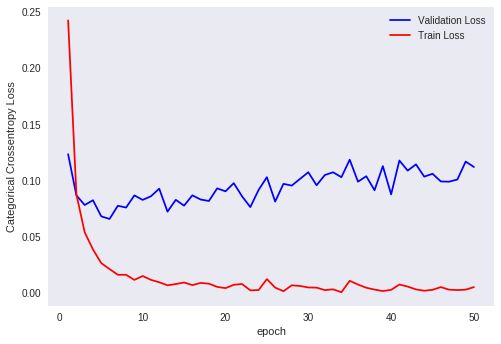

In [18]:
#Plot the train and test loss vs number of epochs
score = model_relu.evaluate(X_test, y_test, verbose=0) 
print('Test score (Validation Loss):', score[0]) 
print('Test accuracy (Accuracy on Unseen Data):', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,nb_epoch+1))

#Display the model
val_loss = history.history['val_loss'] #Validation Loss
loss = history.history['loss'] #Training Loss
plt_dynamic(x, val_loss, loss, ax)

#Save the model.
from keras.models import load_model
model_relu.save('/content/drive/My Drive/MNIST_relu_adam.h5') #Load using: model = load_model('MNIST_simple_softmax.h5')

#Save model information in a list for later use
model_arch='784-512-128-10 (ReLU+ADAM+He)'
nb_hdn_layers=2

scores_history=[np.round(history.history['loss'][-1],4), np.round(history.history['acc'][-1],4), np.round(history.history['val_loss'][-1],4), np.round(history.history['val_acc'][-1],4)]
model_data.append([model_arch,nb_hdn_layers]+scores_history)

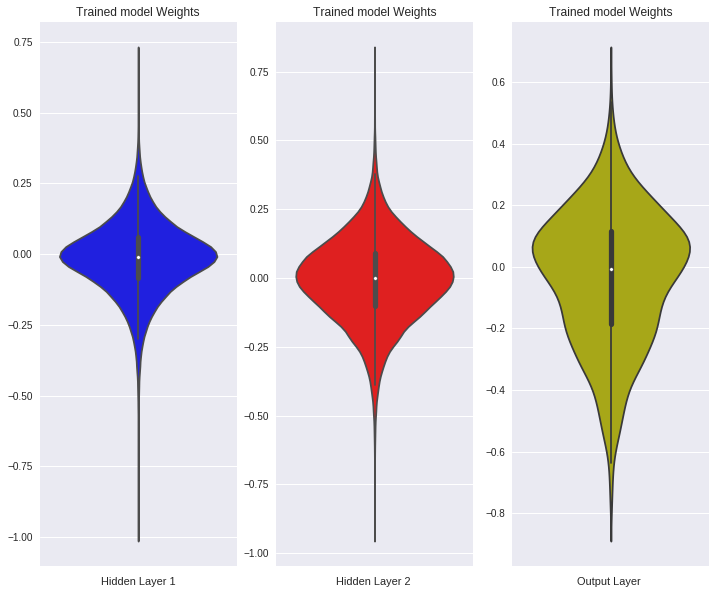

In [19]:
#Violin Plots for all the weights matrices.
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,10))
plt.title("Weight matrices after model is trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> MNIST + ReLU Activation + ADAM optimzer + Dropout + Batch Normalization + He initialization. Model Architecture: 784-512-128-10 ===> 2 Hidden Layers</h3>

In [20]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

output_dim = 10
input_dim = X_train.shape[1] #784 
batch_size = 128 
nb_epoch = 50

#For relu layers
#If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
#h1 =>  σ=√(2/(fan_in) = 0.0505  => N(0,σ) = N(0,0.0505)
#h2 =>  σ=√(2/(fan_in) = 0.0625  => N(0,σ) = N(0,0.0625)
#out =>  σ=√(2/(fan_in+1) = 0.125  => N(0,σ) = N(0,0.125)

model_2_hidden = Sequential()

model_2_hidden.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0505, seed=None)))
model_2_hidden.add(BatchNormalization())
model_2_hidden.add(Dropout(0.5))

model_2_hidden.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model_2_hidden.add(BatchNormalization())
model_2_hidden.add(Dropout(0.5))

model_2_hidden.add(Dense(output_dim, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

#Get a summary of the model.
print(model_2_hidden.summary())

#Compile the model
model_2_hidden.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Run the model.
history = model_2_hidden.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total para

Test score (Validation Loss): 0.053011734530199466
Test accuracy (Accuracy on Unseen Data): 0.9853


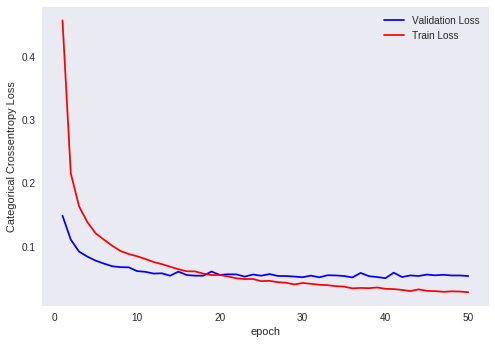

In [21]:
#Plot the train and test loss vs number of epochs
score = model_2_hidden.evaluate(X_test, y_test, verbose=0) 
print('Test score (Validation Loss):', score[0]) 
print('Test accuracy (Accuracy on Unseen Data):', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,nb_epoch+1))

#Display the model
val_loss = history.history['val_loss'] #Validation Loss
loss = history.history['loss'] #Training Loss
plt_dynamic(x, val_loss, loss, ax)

#Save the model.
from keras.models import load_model
model_2_hidden.save('/content/drive/My Drive/MNIST_relu_adam_BN_dropout_784-512-128-10.h5') #Load using: model = load_model('MNIST_simple_softmax.h5')

#Save model information in a list for later use
model_arch='784-512-128-10 (BN+DRPT)'
nb_hdn_layers=2

scores_history=[np.round(history.history['loss'][-1],4), np.round(history.history['acc'][-1],4), np.round(history.history['val_loss'][-1],4), np.round(history.history['val_acc'][-1],4)]
model_data.append([model_arch,nb_hdn_layers]+scores_history)

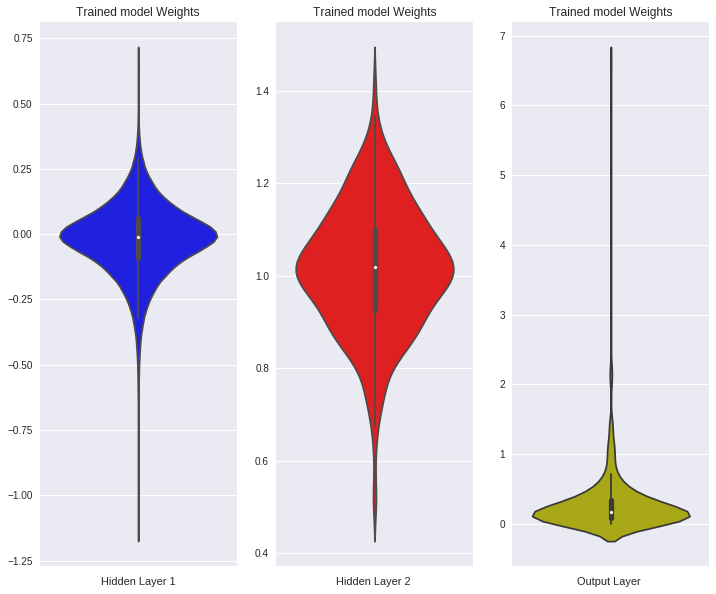

In [22]:
#Violin Plots for all the weights matrices.
w_after = model_2_hidden.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,10))
plt.title("Weight matrices after model is trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> MNIST + ReLU Activation + ADAM optimzer + Dropout + Batch Normalization + He initialization. Model Architecture: 784-784-512-10 ===> 2 Hidden Layers</h3>

In [23]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

output_dim = 10
input_dim = X_train.shape[1] #784 
batch_size = 128 
nb_epoch = 50

#For relu layers
#If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
#h1 =>  σ=√(2/(fan_in) = 0.050  => N(0,σ) = N(0,0.050)
#h2 =>  σ=√(2/(fan_in) = 0.050  => N(0,σ) = N(0,0.050)
#out =>  σ=√(2/(fan_in+1) = 0.0625  => N(0,σ) = N(0,0.0625)

model_2_hidden = Sequential()

model_2_hidden.add(Dense(784, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0505, seed=None)))
model_2_hidden.add(BatchNormalization())
model_2_hidden.add(Dropout(0.5))

model_2_hidden.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0505, seed=None)))
model_2_hidden.add(BatchNormalization())
model_2_hidden.add(Dropout(0.5))

model_2_hidden.add(Dense(output_dim, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))

#Get a summary of the model.
print(model_2_hidden.summary())

#Compile the model
model_2_hidden.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Run the model.
history = model_2_hidden.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 784)               615440    
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total para

Test score (Validation Loss): 0.05703983624438879
Test accuracy (Accuracy on Unseen Data): 0.9868


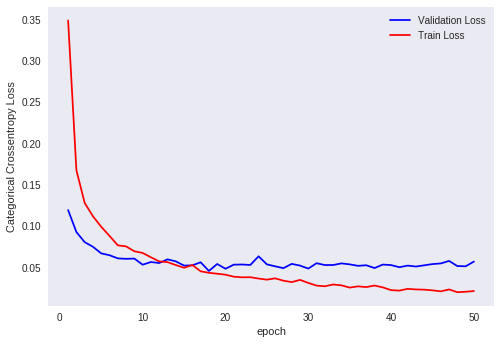

In [24]:
#Plot the train and test loss vs number of epochs
score = model_2_hidden.evaluate(X_test, y_test, verbose=0) 
print('Test score (Validation Loss):', score[0]) 
print('Test accuracy (Accuracy on Unseen Data):', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,nb_epoch+1))

#Display the model
val_loss = history.history['val_loss'] #Validation Loss
loss = history.history['loss'] #Training Loss
plt_dynamic(x, val_loss, loss, ax)

#Save the model.
from keras.models import load_model
model_2_hidden.save('/content/drive/My Drive/MNIST_relu_adam_BN_dropout_784-512-128-10.h5') #Load using: model = load_model('MNIST_simple_softmax.h5')

#Save model information in a list for later use
model_arch='784-512-128-10 (ReLU+ADAM+He+BN+DRPT)'
nb_hdn_layers=2

scores_history=[np.round(history.history['loss'][-1],4), np.round(history.history['acc'][-1],4), np.round(history.history['val_loss'][-1],4), np.round(history.history['val_acc'][-1],4)]
model_data.append([model_arch,nb_hdn_layers]+scores_history)

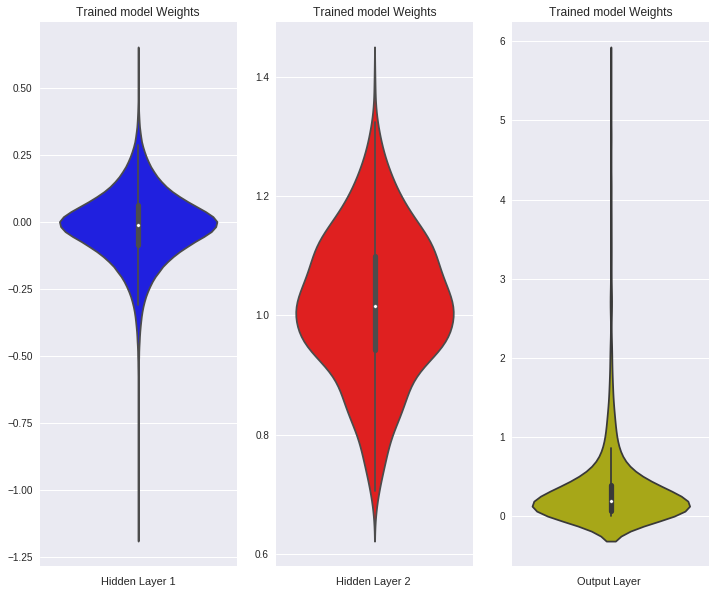

In [25]:
#Violin Plots for all the weights matrices.
w_after = model_2_hidden.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,10))
plt.title("Weight matrices after model is trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> MNIST + ReLU Activation + ADAM optimzer + Dropout + Batch Normalization + He initialization. Model Architecture: 784-512-364-128-10 ===> 3 Hidden Layers</h3>

In [26]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

output_dim = 10
input_dim = X_train.shape[1] #784 
batch_size = 128 
nb_epoch = 50

#For relu layers
#If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
#h1 =>  σ=√(2/(fan_in) = 0.050  => N(0,σ) = N(0,0.0505)
#h2 =>  σ=√(2/(fan_in) = 0.0625  => N(0,σ) = N(0,0.0625)
#h3 =>  σ=√(2/(fan_in) = 0.0741  => N(0,σ) = N(0,0.0741)
#out =>  σ=√(2/(fan_in+1) = 0.125  => N(0,σ) = N(0,0.125)

model_3_hidden = Sequential()

model_3_hidden.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0505, seed=None)))
model_3_hidden.add(BatchNormalization())
model_3_hidden.add(Dropout(0.5))

model_3_hidden.add(Dense(364, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model_3_hidden.add(BatchNormalization())
model_3_hidden.add(Dropout(0.5))

model_3_hidden.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0741, seed=None)))
model_3_hidden.add(BatchNormalization())
model_3_hidden.add(Dropout(0.5))

model_3_hidden.add(Dense(output_dim, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

#Get a summary of the model.
print(model_3_hidden.summary())

#Compile the model
model_3_hidden.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Run the model.
history = model_3_hidden.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 364)               186732    
_________________________________________________________________
batch_normalization_6 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_6 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               46720     
__________

Test score (Validation Loss): 0.05227200525156513
Test accuracy (Accuracy on Unseen Data): 0.9862


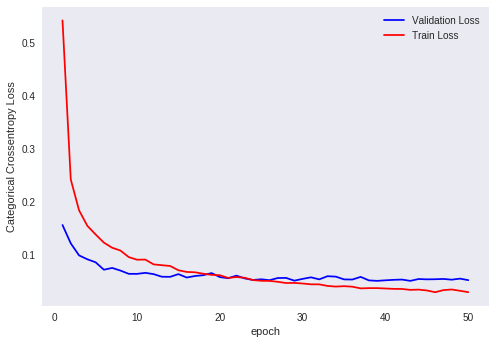

In [27]:
#Plot the train and test loss vs number of epochs
score = model_3_hidden.evaluate(X_test, y_test, verbose=0) 
print('Test score (Validation Loss):', score[0]) 
print('Test accuracy (Accuracy on Unseen Data):', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,nb_epoch+1))

#Display the model
val_loss = history.history['val_loss'] #Validation Loss
loss = history.history['loss'] #Training Loss
plt_dynamic(x, val_loss, loss, ax)

#Save the model.
from keras.models import load_model
model_3_hidden.save('/content/drive/My Drive/MNIST_relu_adam_BN_dropout_784-512-364-128-10.h5') #Load using: model = load_model('MNIST_simple_softmax.h5')

#Save model information in a list for later use
model_arch='784-512-364-128-10 (ReLU+ADAM+He+BN+DRPT)'
nb_hdn_layers=3

scores_history=[np.round(history.history['loss'][-1],4), np.round(history.history['acc'][-1],4), np.round(history.history['val_loss'][-1],4), np.round(history.history['val_acc'][-1],4)]
model_data.append([model_arch,nb_hdn_layers]+scores_history)

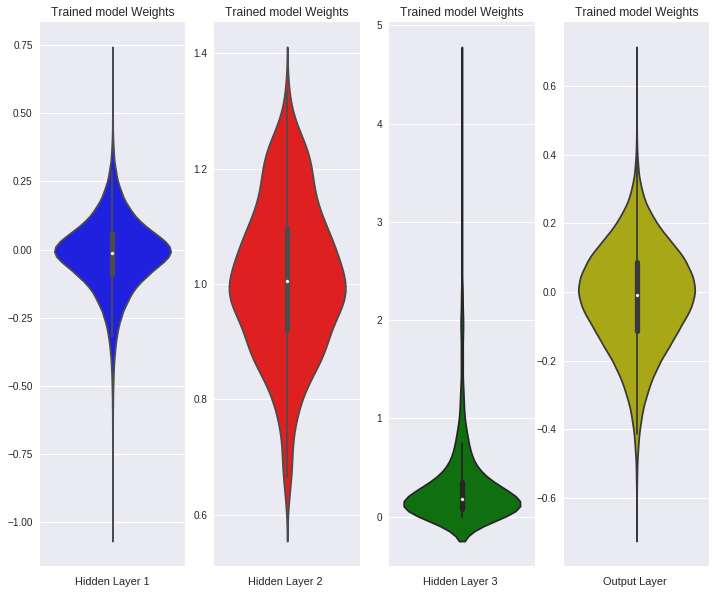

In [28]:
#Violin Plots for all the weights matrices.
w_after = model_3_hidden.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,10))
plt.title("Weight matrices after model is trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> MNIST + ReLU Activation + ADAM optimzer + Dropout + Batch Normalization + He initialization. Model Architecture: 784-364-512-256-128-64-10 ===> 5 Hidden Layers</h3>

In [29]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

output_dim = 10
input_dim = X_train.shape[1] #784 
batch_size = 128 
nb_epoch = 50

#For relu layers
#If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
#h1 =>  σ=√(2/(fan_in) = 0.0505  => N(0,σ) = N(0,0.0505)
#h2 =>  σ=√(2/(fan_in) = 0.0741  => N(0,σ) = N(0,0.0741)
#h3 =>  σ=√(2/(fan_in) = 0.0625  => N(0,σ) = N(0,0.0625)
#h4 =>  σ=√(2/(fan_in) = 0.0883  => N(0,σ) = N(0,0.0883)
#h5 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
#out =>  σ=√(2/(fan_in+1) = 0.1767  => N(0,σ) = N(0,0.1767)

model_5_hidden = Sequential()

model_5_hidden.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0505, seed=None)))
model_5_hidden.add(BatchNormalization())
model_5_hidden.add(Dropout(0.5))

model_5_hidden.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0741, seed=None)))
model_5_hidden.add(BatchNormalization())
model_5_hidden.add(Dropout(0.5))

model_5_hidden.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model_5_hidden.add(BatchNormalization())
model_5_hidden.add(Dropout(0.5))

model_5_hidden.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0883, seed=None)))
model_5_hidden.add(BatchNormalization())
model_5_hidden.add(Dropout(0.5))

model_5_hidden.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_5_hidden.add(BatchNormalization())
model_5_hidden.add(Dropout(0.5))

model_5_hidden.add(Dense(output_dim, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1767, seed=None)))

#Get a summary of the model.
print(model_5_hidden.summary())

#Compile the model
model_5_hidden.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Run the model.
history = model_5_hidden.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_8 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_8 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               186880    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
__________

Test score (Validation Loss): 0.06487449394611176
Test accuracy (Accuracy on Unseen Data): 0.9859


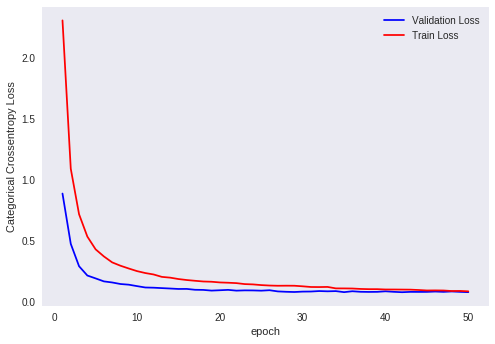

In [39]:
#Plot the train and test loss vs number of epochs
score = model_5_hidden.evaluate(X_test, y_test, verbose=0) 
print('Test score (Validation Loss):', score[0]) 
print('Test accuracy (Accuracy on Unseen Data):', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,nb_epoch+1))

#Display the model
val_loss = history.history['val_loss'] #Validation Loss
loss = history.history['loss'] #Training Loss
plt_dynamic(x, val_loss, loss, ax)

#Save the model.
from keras.models import load_model
model_5_hidden.save('MNIST_relu_adam_BN_dropout_784-364-512-256-128-64-10.h5') #Load using: model = load_model('MNIST_simple_softmax.h5')

#Save model information in a list for later use
model_arch='784-364-512-256-128-64-10 (ReLU+ADAM+He+BN+DRPT)'
nb_hdn_layers=5

scores_history=[np.round(history.history['loss'][-1],4), np.round(history.history['acc'][-1],4), np.round(history.history['val_loss'][-1],4), np.round(history.history['val_acc'][-1],4)]
model_data.append([model_arch,nb_hdn_layers]+scores_history)

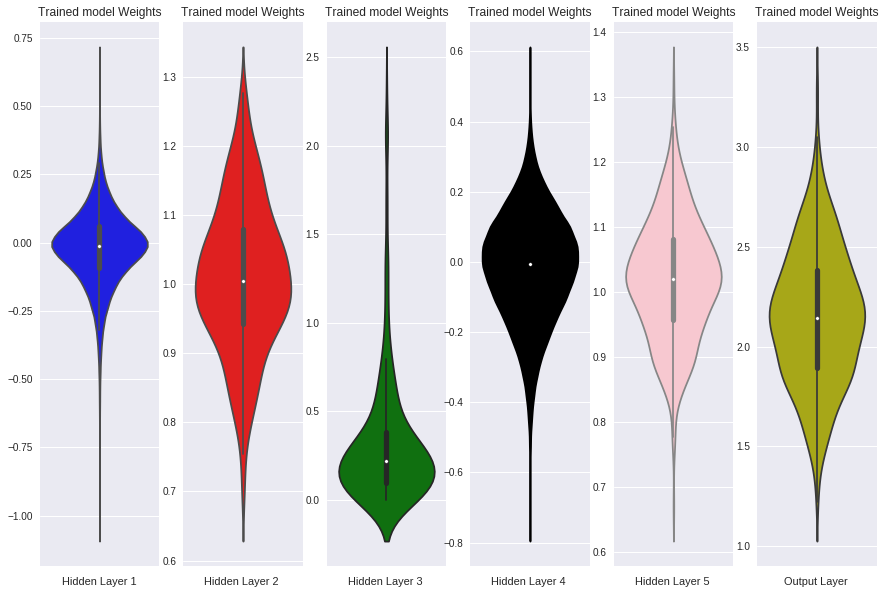

In [31]:
#Violin Plots for all the weights matrices.
w_after = model_5_hidden.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,10))
plt.title("Weight matrices after model is trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='black')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='pink')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> MNIST + ReLU Activation + ADAM optimzer + Dropout + Batch Normalization + He initialization. Model Architecture: 784-512-512-512-512-10 ===> 4 Hidden Layers</h3>

In [32]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

output_dim = 10
input_dim = X_train.shape[1] #784 
batch_size = 128 
nb_epoch = 50

#For relu layers
#If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
#h1 =>  σ=√(2/(fan_in) = 0.0505  => N(0,σ) = N(0,0.0505)
#h2 =>  σ=√(2/(fan_in) = 0.0625  => N(0,σ) = N(0,0.0625)
#h3 =>  σ=√(2/(fan_in) = 0.0625  => N(0,σ) = N(0,0.0625)
#h4 =>  σ=√(2/(fan_in) = 0.0625  => N(0,σ) = N(0,0.0625)
#out =>  σ=√(2/(fan_in+1) = 0.0625  => N(0,σ) = N(0,0.0625)

model_4_hidden = Sequential()

model_4_hidden.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0505, seed=None)))
model_4_hidden.add(BatchNormalization())
model_4_hidden.add(Dropout(0.5))

model_4_hidden.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model_4_hidden.add(BatchNormalization())
model_4_hidden.add(Dropout(0.5))

model_4_hidden.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model_4_hidden.add(BatchNormalization())
model_4_hidden.add(Dropout(0.5))

model_4_hidden.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))
model_4_hidden.add(BatchNormalization())
model_4_hidden.add(Dropout(0.5))

model_4_hidden.add(Dense(output_dim, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0625, seed=None)))

#Get a summary of the model.
print(model_4_hidden.summary())

#Compile the model
model_4_hidden.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Run the model.
history = model_4_hidden.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
__________

Test score (Validation Loss): 0.0537959978406885
Test accuracy (Accuracy on Unseen Data): 0.986


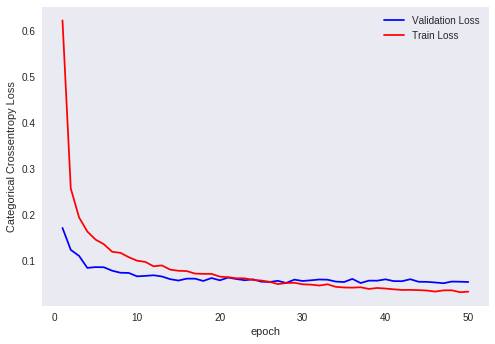

In [33]:
#Plot the train and test loss vs number of epochs
score = model_4_hidden.evaluate(X_test, y_test, verbose=0) 
print('Test score (Validation Loss):', score[0]) 
print('Test accuracy (Accuracy on Unseen Data):', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,nb_epoch+1))

#Display the model
val_loss = history.history['val_loss'] #Validation Loss
loss = history.history['loss'] #Training Loss
plt_dynamic(x, val_loss, loss, ax)

#Save the model.
from keras.models import load_model
model_4_hidden.save('MNIST_relu_adam_BN_dropout_784-512-512-512-512-10.h5') #Load using: model = load_model('MNIST_simple_softmax.h5')

#Save model information in a list for later use
model_arch='784-512-512-512-512-10 (ReLU+ADAM+He+BN+DRPT)'
nb_hdn_layers=4

scores_history=[np.round(history.history['loss'][-1],4), np.round(history.history['acc'][-1],4), np.round(history.history['val_loss'][-1],4), np.round(history.history['val_acc'][-1],4)]
model_data.append([model_arch,nb_hdn_layers]+scores_history)

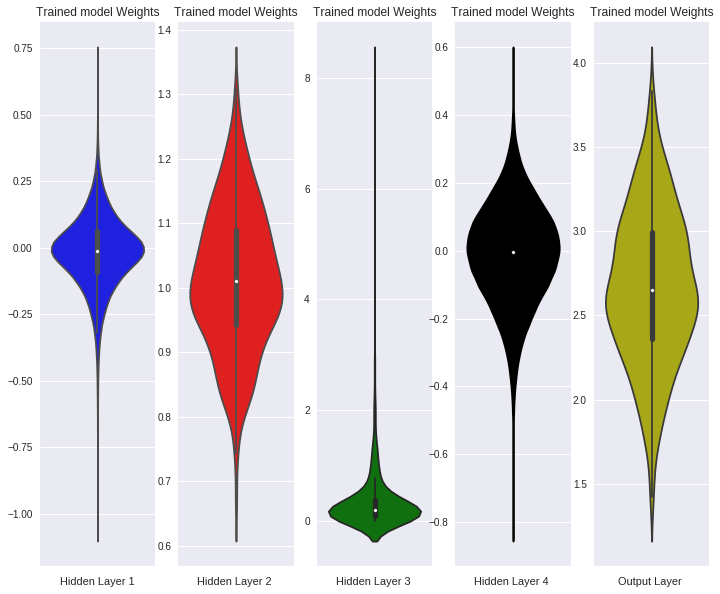

In [34]:
#Violin Plots for all the weights matrices.
w_after = model_4_hidden.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,10))
plt.title("Weight matrices after model is trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='black')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> MNIST + ReLU Activation + ADAM optimzer + Dropout + Batch Normalization + He initialization. Model Architecture: 784-32-32-32-32-32-32-10 ===> 6 Hidden Layers</h3>

In [35]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

output_dim = 10
input_dim = X_train.shape[1] #784 
batch_size = 128 
nb_epoch = 50

#For relu layers
#If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
#h1 =>  σ=√(2/(fan_in) = 0.0505  => N(0,σ) = N(0,0.0505)
#h2 =>  σ=√(2/(fan_in) = 0.25  => N(0,σ) = N(0,0.25)
#h3 =>  σ=√(2/(fan_in) = 0.25  => N(0,σ) = N(0,0.25)
#h4 =>  σ=√(2/(fan_in) = 0.25  => N(0,σ) = N(0,0.25)
#h5 =>  σ=√(2/(fan_in) = 0.25  => N(0,σ) = N(0,0.25)
#h6 =>  σ=√(2/(fan_in) = 0.25  => N(0,σ) = N(0,0.25)
#h5 =>  σ=√(2/(fan_in) = 0.25  => N(0,σ) = N(0,0.25)
#out =>  σ=√(2/(fan_in+1) = 0.25  => N(0,σ) = N(0,0.25)

model_6_hidden = Sequential()

model_6_hidden.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0505, seed=None)))
model_6_hidden.add(BatchNormalization())
model_6_hidden.add(Dropout(0.5))

model_6_hidden.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)))
model_6_hidden.add(BatchNormalization())
model_6_hidden.add(Dropout(0.5))

model_6_hidden.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)))
model_6_hidden.add(BatchNormalization())
model_6_hidden.add(Dropout(0.5))

model_6_hidden.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)))
model_6_hidden.add(BatchNormalization())
model_6_hidden.add(Dropout(0.5))

model_6_hidden.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)))
model_6_hidden.add(BatchNormalization())
model_6_hidden.add(Dropout(0.5))

model_6_hidden.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)))
model_6_hidden.add(BatchNormalization())
model_6_hidden.add(Dropout(0.5))


model_6_hidden.add(Dense(output_dim, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1767, seed=None)))

#Get a summary of the model.
print(model_6_hidden.summary())

#Compile the model
model_6_hidden.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Run the model.
history = model_6_hidden.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_17 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_17 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               186880    
_________________________________________________________________
batch_normalization_18 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
__________

Test score (Validation Loss): 0.07634956583936
Test accuracy (Accuracy on Unseen Data): 0.9845


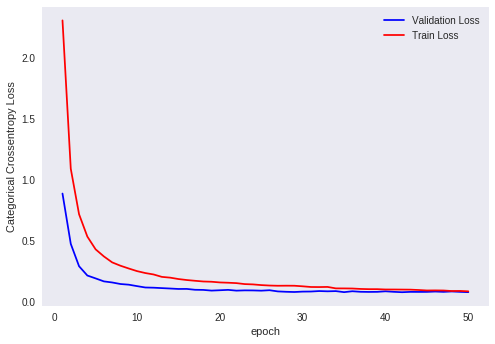

In [36]:
#Plot the train and test loss vs number of epochs
score = model_6_hidden.evaluate(X_test, y_test, verbose=0) 
print('Test score (Validation Loss):', score[0]) 
print('Test accuracy (Accuracy on Unseen Data):', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,nb_epoch+1))

#Display the model
val_loss = history.history['val_loss'] #Validation Loss
loss = history.history['loss'] #Training Loss
plt_dynamic(x, val_loss, loss, ax)

#Save the model.
from keras.models import load_model
model_6_hidden.save('MNIST_relu_adam_BN_dropout_784-32-32-32-32-32-32-10.h5') #Load using: model = load_model('MNIST_simple_softmax.h5')

#Save model information in a list for later use
model_arch='784-32-32-32-32-32-32-10 (ReLU+ADAM+He+BN+DRPT)'
nb_hdn_layers=6

scores_history=[np.round(history.history['loss'][-1],4), np.round(history.history['acc'][-1],4), np.round(history.history['val_loss'][-1],4), np.round(history.history['val_acc'][-1],4)]
model_data.append([model_arch,nb_hdn_layers]+scores_history)

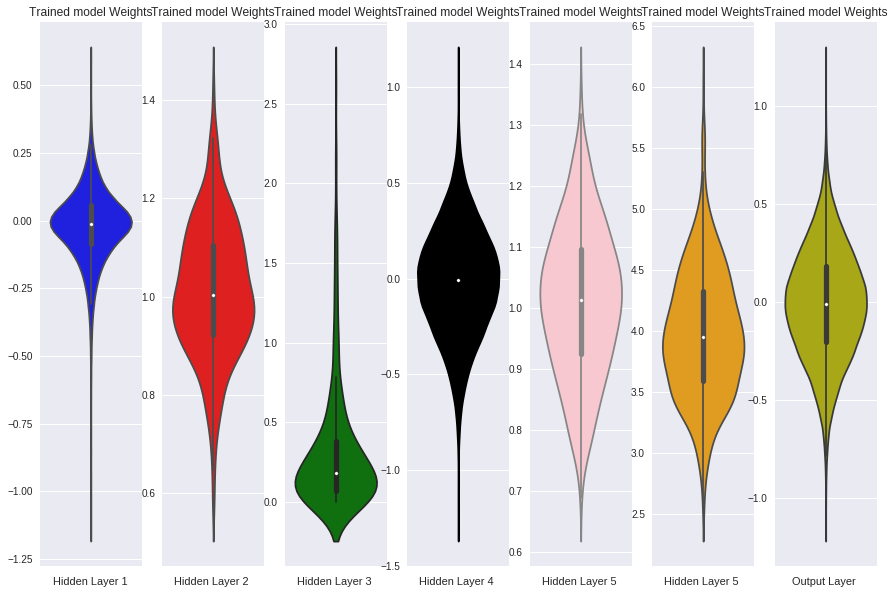

In [37]:
#Violin Plots for all the weights matrices.
w_after = model_6_hidden.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
h6_w = w_after[10].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,10))
plt.title("Weight matrices after model is trained")
plt.subplot(1, 7, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 7, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 7, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 7, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='black')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 7, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='pink')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 7, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h6_w, color='orange')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 7, 7)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>Summary of all the Loss and Accuracy values for all model architectures.</h3>

In [38]:
import pandas as pd
model_info=pd.DataFrame(model_data,columns=['Model Architecture', 'No. of Hidden Layerss', 'Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy'])
model_info.to_csv('model_info_loss_data.csv')

model_info

,Model Architecture,No. of Hidden Layerss,Train Loss,Train Accuracy,Test Loss,Test Accuracy
0,784-10 (Simple Softmax),0,0.3100,0.9139,0.2993,0.9172
1,784-512-128-10 (ReLU+ADAM+He),2,0.0053,0.9987,0.1120,0.9824
2,784-512-128-10 (BN+DRPT),2,0.0275,0.9910,0.0530,0.9853
3,784-512-128-10 (ReLU+ADAM+He+BN+DRPT),2,0.0214,0.9933,0.0570,0.9868
4,784-512-364-128-10 (ReLU+ADAM+He+BN+DRPT),3,0.0296,0.9908,0.0523,0.9862
5,784-364-512--256-128-64-10 (ReLU+ADAM+He+BN+DRPT),5,0.0588,0.9849,0.0649,0.9859
6,784-512-512-512-512-10 (ReLU+ADAM+He+BN+DRPT),4,0.0328,0.9900,0.0538,0.9860
7,784-32-32-32-32-32-32-10 (ReLU+ADAM+He+BN+DRPT),6,0.0831,0.9806,0.0763,0.9845
